In [ ]:
# first option (classic way to consume API)
# obtain all the available metrics of the wholesale energy market in Colombia
import requests
import json

url = "http://servapibi.xm.com.co/lists"

body = {"MetricId": "ListadoMetricas"}
data = requests.post(url, json = body)

if data.status_code == 200:
    data = data.json()

print(json.dumps(data, indent = 4))

In [166]:
# second option (use the library "pydataxm" using the class methods of ReadDB specified in the repository "https://github.com/EquipoAnaliticaXM/API_XM")
# obtain all the available metrics of the wholesale energy market in Colombia
from pydataxm import *
import pandas as pd

## configurate pandas view
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', 2000)

## create instance
objectAPI = pydataxm.ReadDB()

df = objectAPI.get_collections()
df = pd.DataFrame(df)
#df.to_csv("metricas_mercado_mayorista_API_XM.csv")
#df.sort_values(by='MaxDays', ascending=False)
df

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
0,DemaReal,Demanda Real por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados que hacen parte del Sistema Interconectado Nacional (no incluye Alumbrado Público)
1,DemaReal,Demanda Real por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados que hacen parte del Sistema Interconectado Nacional (no incluye Alumbrado Público)
2,ExpoMoneda,Exportaciones Moneda por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,Transferencias de Energia desde Colombia hacia otros paises
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.
4,Gene,Generación por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nacionales en sus puntos de frontera.
5,GeneIdea,Generación Ideal por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Despacho de generacion que resulta de considerar una red de transporte inexistente
6,PrecBolsNaci,Precio Bolsa Nacional por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP/kWh,"Precio de oferta de la última planta flexible para atender la demanda comercial nacional, más delta de incremento para remunerar los costos no cubiertos de las plantas térmicas en el despacho ideal."
7,RestAliv,Restricciones Aliviadas por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,"“Es el valor a cargo de los comercializadores por concepto de restricciones después de aplicar los alivios definidos en la regulación vigente”, la regla de negocio de esta métrica sería la Resolución"
8,ConsCombustibleMBTU,Consumo Combustible MBTU por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,MBTU,Los generadores térmicos deben reportar diariamente según resolución CREG 084 de 2005 el consumo de combustible en MBTU
9,Gene,Generación por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generacion neta de cada una de las plantas Nacionales en sus puntos de frontera.


In [5]:
# cada metrica nos permite ver desde cuantas entidades podemos consultar, en este caso demanda comercial vista desde el sistema, por agente y mercado de comercialización
objectAPI.get_collections('DemaCome') 

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.
11,DemaCome,Demanda Comercial por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.
83,DemaCome,Demanda Comercial por MercadoComercializacion,MercadoComercializacion,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.


In [180]:
# ejemplo de consulta (generación programada despachada para el 31 de diciembre 2023)
import datetime as dt

df_variable = objectAPI.request_data(
    "GeneProgDesp",
    "Recurso",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

df_variable.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,17400.0,2023-12-31
1,Recurso,2QEK,35000.0,35000.0,35000.0,35000.0,35000.0,28670.0,NaN,NaN,NaN,NaN,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,35000.0,2023-12-31
2,Recurso,2QRL,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,650.0,2023-12-31
3,Recurso,2QV2,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,2023-12-31
4,Recurso,2R22,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,14000.0,2023-12-31


In [168]:
##### Analisis sistemico del precio de energía Mayorista de colombia en Diciembre 2023
##### libraries & object xm instance

from pydataxm import *
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)
objectAPI = pydataxm.ReadDB()

In [146]:
## functions

## function grafica de la demanda x hora y día
def plotdaysdemand(demand, title, x, y):
    fig, ax = plt.subplots(figsize=(10, 7))

    for i in range(len(demand)):
        ax.plot(demand.columns[2:-1], demand.iloc[i, 2:-1], label=f'Día {i+1}')

    ax.set_xticklabels([col[-6:] for col in demand.columns[2:-1]])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

    fig.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), ncol=1)
    plt.xticks(rotation=50)
    plt.show()

## heat map function (plot the demand)
def plotdemand(demand, title, x, y, label):
    values_by_day = demand.iloc[:, 2:-1].values

    fig, ax = plt.subplots(figsize=(10, 7))
    heatmap = ax.imshow(values_by_day, cmap='inferno', aspect='auto')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

    cbar = fig.colorbar(heatmap)
    cbar.set_label(label)

    fig.tight_layout()
    plt.xticks(np.arange(len(demand.columns[2:-1])), demand.columns[2:-1], rotation=45)
    plt.yticks(np.arange(len(demand)), [f'Día {i+1}' for i in range(len(demand))])
    plt.show()

In [179]:
### Real demand (System) [MWh]
december = objectAPI.request_data(
    "DemaReal",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaReal",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand = pd.concat([december, thirtyone], ignore_index=True)
demand.iloc[:, 2:-1] /= 1000
demand.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,8734.64584,8355.19599,8056.42475,7912.69742,8016.54396,8291.44688,8529.44413,9123.23137,9578.70997,9995.18847,10455.94692,10728.74866,10728.54834,10801.32693,10979.43170,10928.21288,10648.69379,10515.23426,11080.04860,11022.73849,10773.86968,10284.80821,9731.51257,9169.49154,2023-12-01
1,Sistema,Sistema,8494.72030,8145.10541,7913.30389,7763.50802,7761.71439,7819.98636,7985.63248,8494.56414,9185.67115,9653.51044,9973.49061,10144.28898,10083.72548,10025.98365,9971.06769,9903.71898,9839.16433,9910.17550,10552.46642,10435.07316,10091.77283,9697.57505,9209.58993,8713.07387,2023-12-02
2,Sistema,Sistema,8326.23617,7867.11930,7625.48903,7390.91290,7272.63657,7145.78239,7011.47224,7396.14193,7721.64339,8149.52297,8471.65668,8852.55006,9024.78156,9119.01661,9073.80044,9018.39410,8928.59957,9070.79078,9892.71646,10005.19147,9831.12008,9530.90096,9115.38620,8678.04162,2023-12-03
3,Sistema,Sistema,8282.39858,7986.76122,7810.08228,7727.76449,7849.58091,8056.09947,8338.49388,8983.20601,9667.48352,10003.42365,10389.19050,10684.46095,10685.09407,10821.94978,11026.35702,11106.65422,10975.74167,10755.27825,11131.01511,11137.32938,10925.66510,10475.20658,9892.84770,9290.99884,2023-12-04
4,Sistema,Sistema,8847.57597,8477.97159,8300.43663,8173.85574,8267.86591,8517.66740,8811.16572,9410.40409,9941.70766,10228.48757,10549.99932,10843.82588,10814.10614,10924.02245,11078.73565,11146.95694,11147.84500,10955.48978,11477.88427,11426.60466,11203.66134,10733.02236,10113.37535,9523.59988,2023-12-05


C:\Users\jebernate\AppData\Local\Temp\ipykernel_16324\817578421.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([col[-6:] for col in demand.columns[2:-1]])


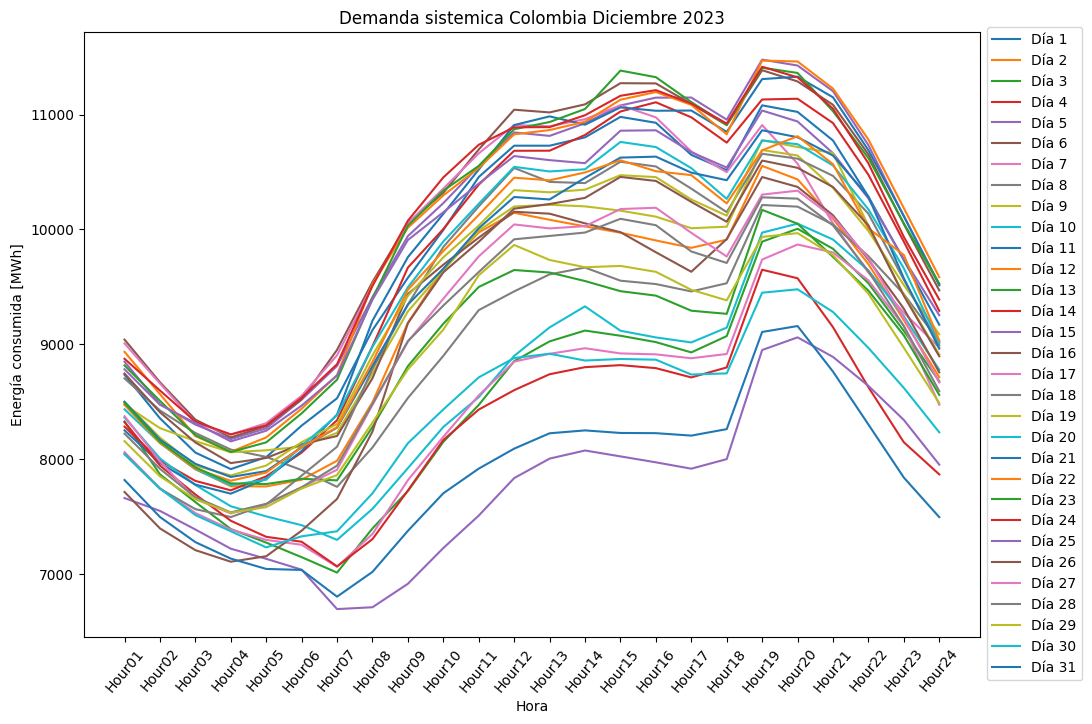

In [134]:
## Real demand (line x day analysis)
title = 'Demanda sistemica Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía consumida [MWh]'
plotdaysdemand(demand, title, x, y)

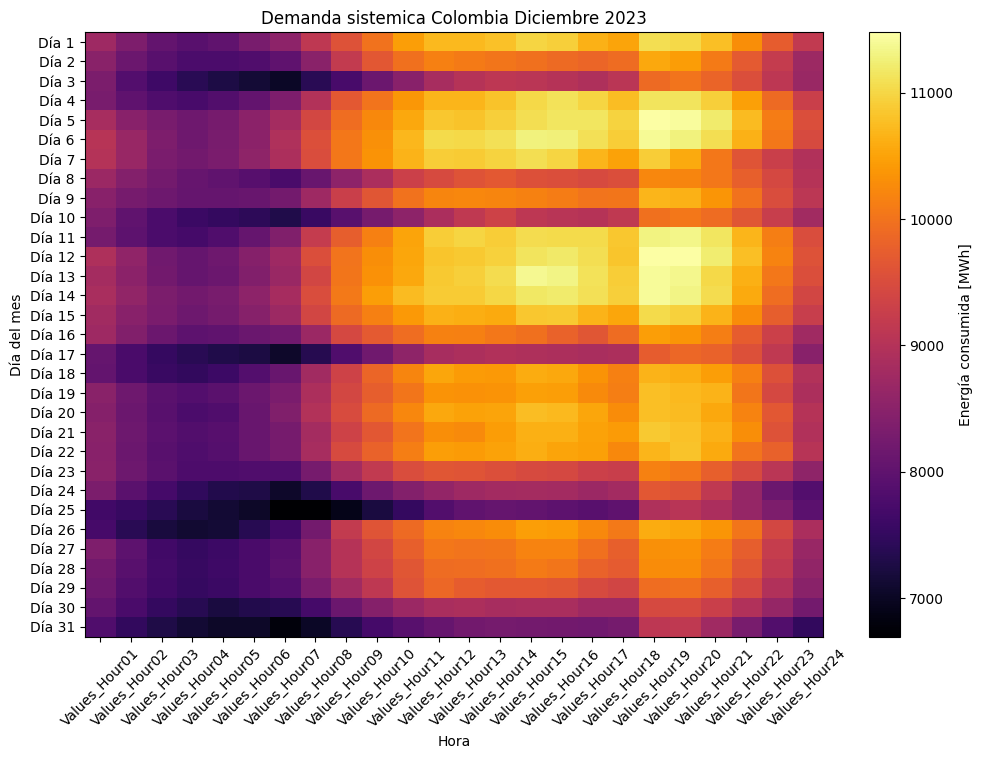

In [147]:
## Real demand (heat map analysis)
title = 'Demanda sistemica Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía consumida [MWh]'
plotdemand(demand, title, x, y, label)


In [178]:
### Demanda Regulada (System) [MWh]
december = objectAPI.request_data(
    "DemaRealReg",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaRealReg",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand_reg = pd.concat([december, thirtyone], ignore_index=True)
demand_reg.iloc[:, 2:-1] /= 1000
demand_reg.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,5410.57393,5105.12859,4907.50938,4802.37144,4901.71892,5119.58491,5524.46081,6009.07097,6486.06914,6795.48549,7111.50946,7402.09186,7382.80288,7435.54132,7582.64029,7537.88443,7332.89725,7185.47939,7472.31296,7424.50579,7248.98968,6907.00219,6432.50640,5932.29331,2023-12-01
1,Sistema,Sistema,5491.59746,5179.85778,4966.39698,4851.08874,4867.56226,4929.42271,5250.96791,5705.81377,6203.01157,6538.69563,6818.55739,7015.24051,6974.54595,6925.24715,6882.11279,6802.07458,6681.77090,6758.97094,7196.57685,7138.66593,6927.70909,6626.08845,6228.29386,5797.94968,2023-12-02
2,Sistema,Sistema,5402.38425,5106.81593,4890.41006,4731.13470,4664.18340,4583.75353,4713.67059,5039.11431,5426.33762,5737.08352,6021.53490,6241.68212,6376.35334,6417.44996,6379.79851,6314.03879,6207.34498,6276.83450,6783.69081,6890.09928,6808.99948,6588.17768,6176.83475,5679.29461,2023-12-03
3,Sistema,Sistema,5270.41493,4984.75810,4806.44664,4723.48014,4818.12933,4990.19289,5425.09635,5943.57675,6408.18891,6723.86466,7034.22709,7310.59693,7315.68729,7377.00213,7511.78792,7474.66040,7315.59024,7176.78771,7472.33163,7543.94309,7408.40981,7057.41762,6486.43187,5898.78491,2023-12-04
4,Sistema,Sistema,5438.09853,5130.09138,4941.05441,4847.38978,4946.42481,5181.15604,5597.66634,6081.08743,6559.57571,6861.46520,7182.32046,7452.86361,7445.49731,7515.22861,7640.66410,7619.85883,7450.91673,7266.06458,7612.33816,7588.23300,7409.48937,7056.82903,6496.75853,5927.45243,2023-12-05


C:\Users\jebernate\AppData\Local\Temp\ipykernel_16324\817578421.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([col[-6:] for col in demand.columns[2:-1]])


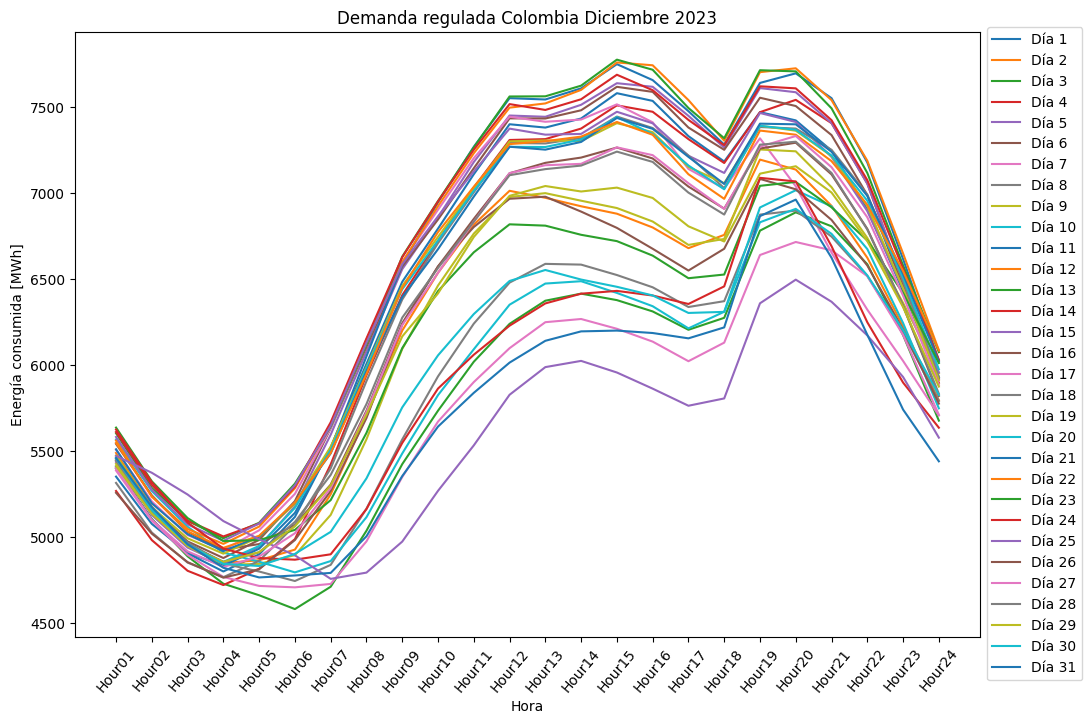

In [138]:
## Demanda regulada (line x day analysis)
title = 'Demanda regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía consumida [MWh]'
plotdaysdemand(demand_reg, title, x, y)

C:\Users\jebernate\AppData\Local\Temp\ipykernel_16324\817578421.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([col[-6:] for col in demand.columns[2:-1]])


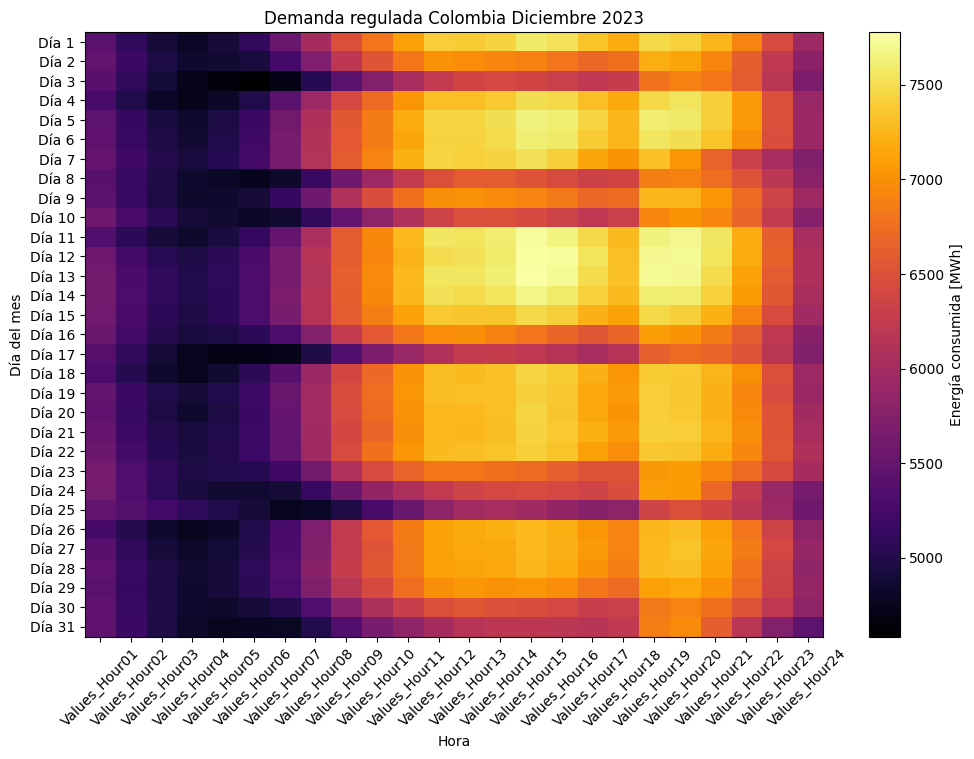

In [139]:
## Demanda regulada (heat map analysis)
title = 'Demanda regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía consumida [MWh]'
plotdemand(demand_reg, title, x, y, label)

In [177]:
### Demanda No regulada (System) [MWh]
december = objectAPI.request_data(
    "DemaRealNoReg",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaRealNoReg",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand_noreg = pd.concat([december, thirtyone], ignore_index=True)
demand_noreg.iloc[:, 2:-1] /= 1000
demand_noreg.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,3014.67825,2978.12300,2960.17396,2926.43802,2931.02729,2943.65737,2790.78551,2883.59482,2862.04819,2879.46523,3011.44755,3017.04704,3046.83727,3065.41824,3098.08699,3083.15802,3085.48955,3099.87208,3275.01958,3250.20020,3186.89474,3088.85764,3010.18907,2996.78836,2023-12-01
1,Sistema,Sistema,2953.69709,2925.96142,2904.72611,2869.21184,2851.19747,2849.18743,2692.59079,2751.54076,2766.84683,2781.28361,2815.38488,2789.72521,2770.72882,2762.40218,2750.44421,2759.21072,2814.59374,2808.79928,3007.43297,2940.15576,2865.28411,2774.70144,2733.08882,2667.96551,2023-12-02
2,Sistema,Sistema,2638.01192,2598.18033,2630.24161,2573.30631,2521.48930,2472.85184,2215.51572,2227.81486,2160.85742,2187.93610,2218.37582,2282.87485,2317.51193,2369.40424,2362.21920,2371.70609,2387.96223,2460.12788,2709.21952,2705.08540,2718.58458,2655.68784,2697.67066,2755.60431,2023-12-03
3,Sistema,Sistema,2770.72594,2752.03697,2755.48975,2758.15354,2785.50633,2823.57361,2674.95501,2799.78722,2842.38565,2853.23161,2933.06588,2973.80259,2955.71948,3025.23829,3076.32792,3188.57582,3219.50934,3171.90089,3356.52602,3320.97446,3243.95513,3139.68343,3119.68349,3094.34790,2023-12-04
4,Sistema,Sistema,3117.95053,3057.03717,3066.09236,3040.96727,3037.99216,3053.61109,2938.10578,3039.77959,3088.15891,3063.14344,3062.86140,3085.87049,3063.30819,3104.79467,3131.76247,3188.99514,3218.05979,3213.54421,3388.40908,3345.02017,3301.85095,3209.19108,3105.65814,3111.57604,2023-12-05


C:\Users\jebernate\AppData\Local\Temp\ipykernel_16324\3859801567.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([col[-6:] for col in demand.columns[2:-1]])


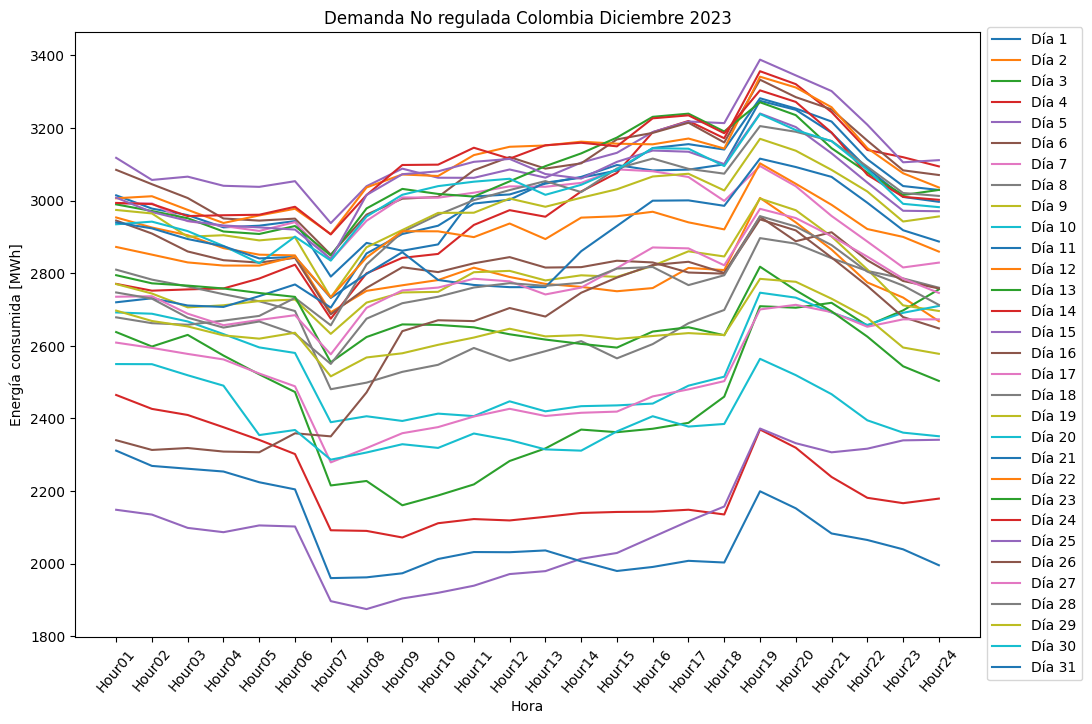

In [176]:
## Demanda No regulada (line x day analysis)
title = 'Demanda No regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía consumida [MWh]'
plotdaysdemand(demand_noreg, title, x, y)

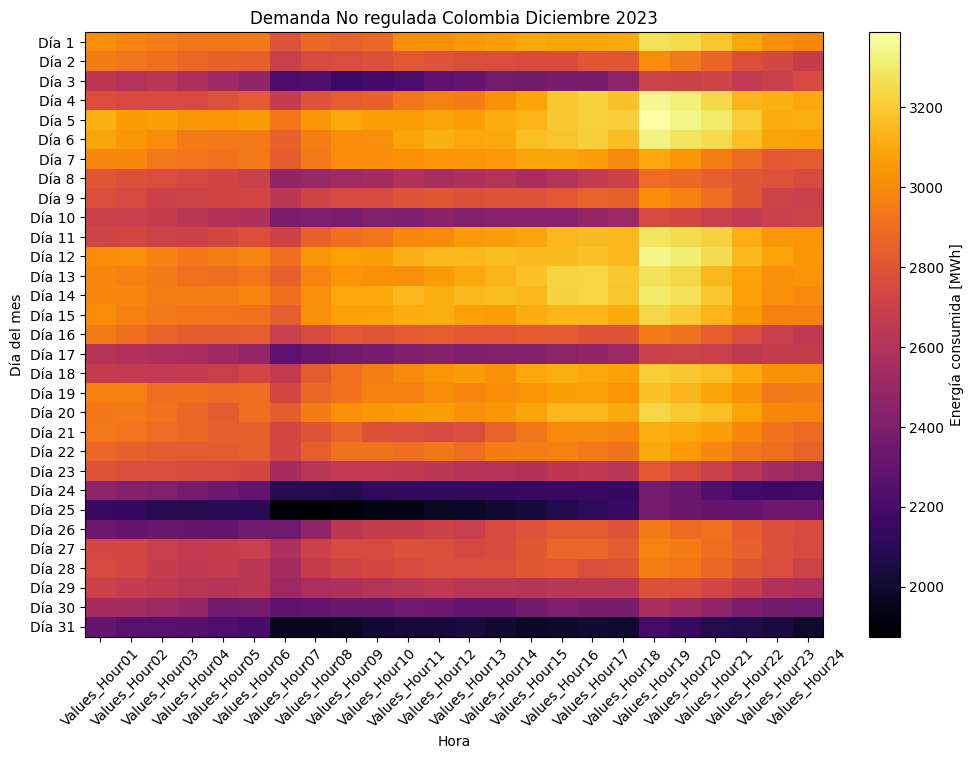

In [174]:
## Demanda No regulada (heat map analysis)
title = 'Demanda No regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía consumida [MWh]'
plotdemand(demand_noreg, title, x, y, label)

In [173]:
### Generation (System) [MWh]
december = objectAPI.request_data(
    "Gene",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "Gene",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

generation = pd.concat([december, thirtyone], ignore_index=True)
generation.iloc[:, 2:-1] /= 1000
generation.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,8848.84948,8474.28680,8168.62487,8022.09441,8124.13580,8409.02568,8647.42084,9236.24775,9695.21626,10118.87006,10593.67493,10880.46676,10876.32371,10945.85832,11127.29564,11068.65985,10791.92641,10638.77661,11245.35198,11184.02133,10931.94847,10434.19688,9876.80948,9305.85475,2023-12-01
1,Sistema,Sistema,8619.44796,8263.30039,8031.37907,7875.17310,7875.82617,7935.64121,8088.03551,8599.93832,9315.89248,9807.03532,10119.37750,10287.60405,10232.30233,10187.79699,10129.81729,10059.37049,9993.03137,10066.62826,10729.52291,10609.87658,10251.74407,9847.24734,9342.17184,8844.35628,2023-12-02
2,Sistema,Sistema,8445.65146,7980.00935,7733.82108,7503.15828,7384.53189,7267.78633,7116.20560,7497.92002,7835.94402,8281.11776,8609.38647,8999.41799,9176.37455,9265.79611,9214.93650,9154.78218,9062.87264,9204.37493,10045.91932,10153.51962,9975.92413,9670.56671,9247.74974,8808.27735,2023-12-03
3,Sistema,Sistema,8415.24857,8113.15976,7944.26911,7864.37971,7986.72347,8198.77920,8477.85358,9115.62460,9825.58126,10159.79866,10548.74795,10844.70666,10853.78755,10997.89793,11202.53466,11284.60486,11164.36886,10917.65099,11288.89514,11302.10355,11092.18908,10636.25160,10035.46746,9413.18180,2023-12-04
4,Sistema,Sistema,8956.40608,8588.81126,8414.61819,8294.95326,8396.66838,8653.27595,8946.55593,9540.51698,10068.85586,10360.03131,10680.71507,10981.95840,10959.03826,11051.04498,11214.75305,11278.22134,11305.71514,11100.99423,11637.13069,11588.37054,11356.73070,10878.59281,10251.90413,9662.58854,2023-12-05


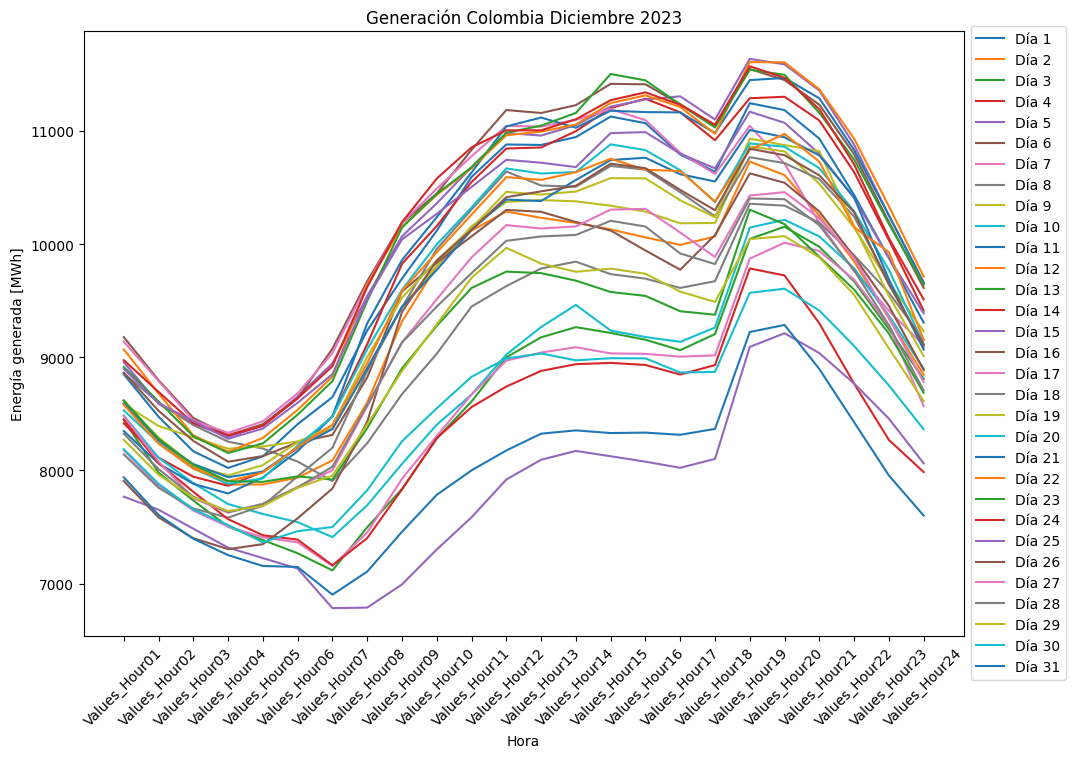

In [51]:
## Generation (line x day analysis)
title = 'Generación Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía generada [MWh]'
plotdaysdemand(generation, title, x, y)

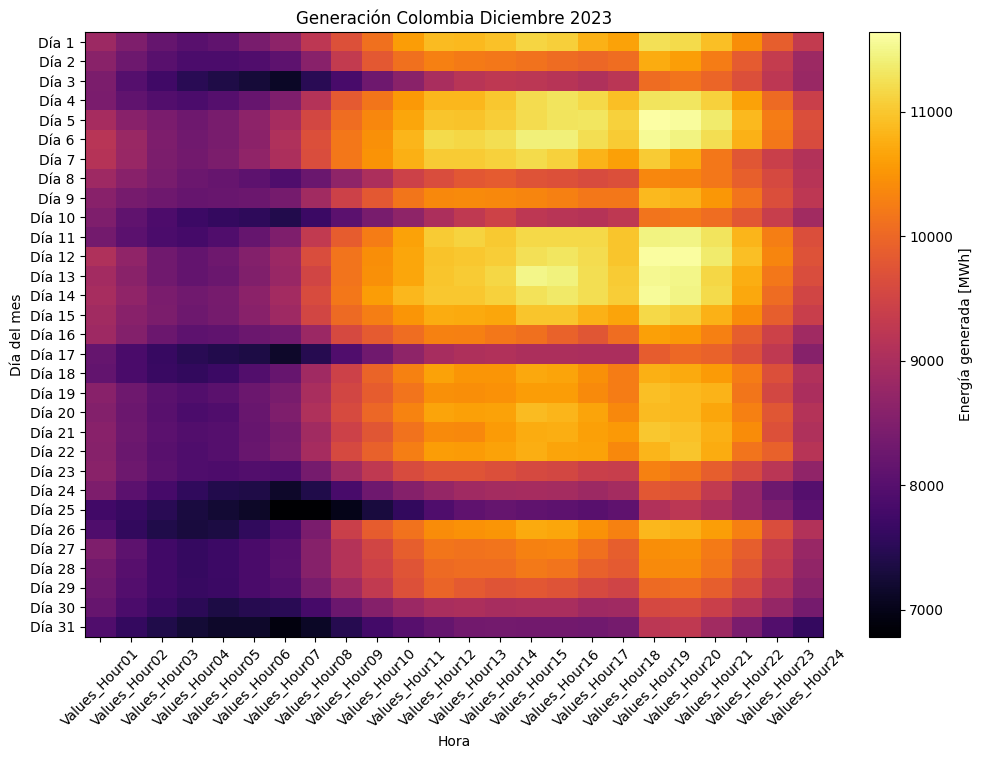

In [53]:
## Generation (heat map analysis)
title = 'Generación Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía generada [MWh]'
plotdemand(generation, title, x, y, label)

In [172]:
### Generation (Resource) [MWh]
decemberxresource = objectAPI.request_data(
    "Gene",
    "Recurso",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyonexresource = objectAPI.request_data(
    "Gene",
    "Recurso",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

generationxresource = pd.concat([decemberxresource, thirtyonexresource], ignore_index=True)
generationxresource.iloc[:, 2:-1] /= 1000
generationxresource.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,12.08820,11.86120,11.68618,11.57627,11.50250,11.46072,11.91460,12.04663,11.98256,11.94518,11.81372,11.85620,11.78837,11.65867,11.41207,11.47500,11.47658,11.40753,11.40963,11.53678,11.55634,11.40431,11.24553,11.14637,2023-12-01
1,Recurso,2QRL,0.64818,0.64752,0.64743,0.64710,0.64743,0.64746,0.64752,0.64743,0.64746,0.64707,0.64572,0.64731,0.64743,0.64761,0.64746,0.64734,0.64734,0.64713,0.64674,0.64695,0.64707,0.64647,0.64680,0.64659,2023-12-01
2,Recurso,2QV2,6.87600,6.87600,6.87600,6.87600,6.87600,6.87600,6.87960,6.87960,6.87600,6.87240,6.87240,6.87600,6.87240,6.87240,6.86880,6.86880,6.87240,6.87600,6.87240,5.27040,4.52880,6.49080,6.82200,6.39360,2023-12-01
3,Recurso,2R22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01
4,Recurso,2S6Q,0.21300,0.03540,0.02820,0.00720,0.03720,0.06900,0.17880,0.13080,0.11160,0.16560,0.16200,0.09420,0.16980,0.20280,0.16740,0.13140,0.18900,0.04380,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01


In [15]:
## load listado recursos gen
df_recursos = pd.read_excel('Listado_Recursos_Generacion.xlsx', header=3)
df_recursos.rename(columns={'Código SIC': 'codigo'}, inplace=True)
df_recursos.head()

,codigo,Nombre Recurso,Capacidad Efectiva Neta [MW],Factor de Conversión,Es Menor,Tipo Despacho,Combustible por Defecto,Fecha Operación,Municipio,Departamento,Agente Representante,Estado Recurso,Tipo Generación,Clasificación
0,3JNR,AUTOG UNIBOL 1,4.9,7.500,SI,ND,GAS,2024-02-11,BARRANQUILLA,ATLÁNTICO,ENERCO S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
1,TCBE,TERMOCARIBE III 1,42.0,8.703,NO,DC,GAS,2022-11-24,SANTA ROSADE LIMA,BOLÍVAR,TERMO CARIBE S.A.S. E.S.P.,PRUEBAS,TERMICA,NORMAL
2,3C3X,AUTOG INGENIO MARIA LUISA,1.8,0.000,NO,ND,BAGAZO,2021-08-14,FLORIDA,VALLE DEL CAUCA,DEPI ENERGY S.A.S. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
3,3AXV,AGPE INGENIO DE OCCIDENTE,1.0,0.000,NO,ND,BAGAZO,2021-03-04,VILLA RICA,CAUCA,EMPRESA MUNICIPAL DE ENERGIA ELECTRICA S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
4,3AL6,AGPE ENTREPALMAS,0.5,0.000,NO,ND,BIOGAS,2020-12-31,SAN MARTIN,META,CELSIA COLOMBIA S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA


In [20]:
## merge dataframes
df_merged = (
    generationxresource.merge(df_recursos[['codigo', 'Nombre Recurso']], left_on = 'Values_code', right_on = 'codigo')
    .drop(columns=['codigo'])
)
df_merged.insert(2, "Nombre recurso", df_merged.pop('Nombre Recurso'))
df_merged.head()

,Id,Values_code,Nombre recurso,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,EL POPAL,12.08820,11.86120,11.68618,11.57627,11.50250,11.46072,11.91460,12.04663,11.98256,11.94518,11.81372,11.85620,11.78837,11.65867,11.41207,11.47500,11.47658,11.40753,11.40963,11.53678,11.55634,11.40431,11.24553,11.14637,2023-12-01
1,Recurso,2QRL,LA REBUSCA,0.64818,0.64752,0.64743,0.64710,0.64743,0.64746,0.64752,0.64743,0.64746,0.64707,0.64572,0.64731,0.64743,0.64761,0.64746,0.64734,0.64734,0.64713,0.64674,0.64695,0.64707,0.64647,0.64680,0.64659,2023-12-01
2,Recurso,2QV2,BAJO TULUA,6.87600,6.87600,6.87600,6.87600,6.87600,6.87600,6.87960,6.87960,6.87600,6.87240,6.87240,6.87600,6.87240,6.87240,6.86880,6.86880,6.87240,6.87600,6.87240,5.27040,4.52880,6.49080,6.82200,6.39360,2023-12-01
3,Recurso,2R22,LAGUNETA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01
4,Recurso,2S6Q,AUTOG YAGUARITO,0.21300,0.03540,0.02820,0.00720,0.03720,0.06900,0.17880,0.13080,0.11160,0.16560,0.16200,0.09420,0.16980,0.20280,0.16740,0.13140,0.18900,0.04380,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01


In [60]:
# generation acumulate x resource
columns_to_sum = df_merged.columns[3:-1]
df_total = df_merged.groupby('Nombre recurso')[columns_to_sum].sum()
df_total = df_total.reset_index()
df_total['total'] = df_total.iloc[:, 3:-1].sum(axis=1)
df_sort = df_total.sort_values(by = 'total', ascending = False)
df_sort.head()

,Nombre recurso,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,total
127,ITUANGO,26758.68048,26820.34507,26643.60187,26567.03890,26802.68860,27267.50994,28640.38951,29020.71632,28722.39814,28800.48886,29041.54195,29036.75622,29010.81462,28885.95417,29212.59520,29246.81021,29295.62626,29357.48924,29072.69355,29108.86050,29443.32095,28750.38822,27300.26370,27191.55984,599227.94693
110,GUAVIO,14336.47432,12677.89378,10990.32724,10179.87448,10150.31745,11557.69925,11788.45850,13504.64051,15557.64712,16525.79808,18123.22520,19675.88021,19612.62868,19330.80736,20179.70672,20695.38592,20950.43187,21940.68279,25674.66575,25574.10228,25148.45716,23982.27987,21858.68255,17016.33371,383001.69899
221,SAN CARLOS,11317.51057,10491.55001,9321.92906,8010.37099,7652.15978,8216.07831,8020.32710,9738.33465,11925.67099,14220.82129,16027.36013,18064.40968,18884.54536,19293.65135,20638.81252,21102.46466,21178.48256,21180.39787,24613.84306,24125.38391,22066.75151,20767.55591,18635.36585,14722.32835,343684.71654
240,TEBSAB CC,16102.56381,15841.62732,15660.14471,15399.41112,15191.94405,15396.40958,15004.05360,14926.01317,15201.41532,15608.03965,15997.22122,16204.33793,16110.03149,16287.74305,16343.46228,16404.33391,16442.34722,17058.97346,17775.63461,17589.55937,17376.06417,17091.24830,16752.93336,16609.81589,339821.32157
71,CHIVOR,10883.67736,9859.95473,9532.66326,9277.82162,9342.20295,9429.19052,9231.87168,8973.44454,9099.15236,9274.70713,10094.62940,11251.49987,11866.87694,12467.25057,12879.61062,13398.63812,14075.77721,14640.50317,17615.55386,17423.15232,16035.92647,14000.19399,12367.20345,11891.33894,252277.87005


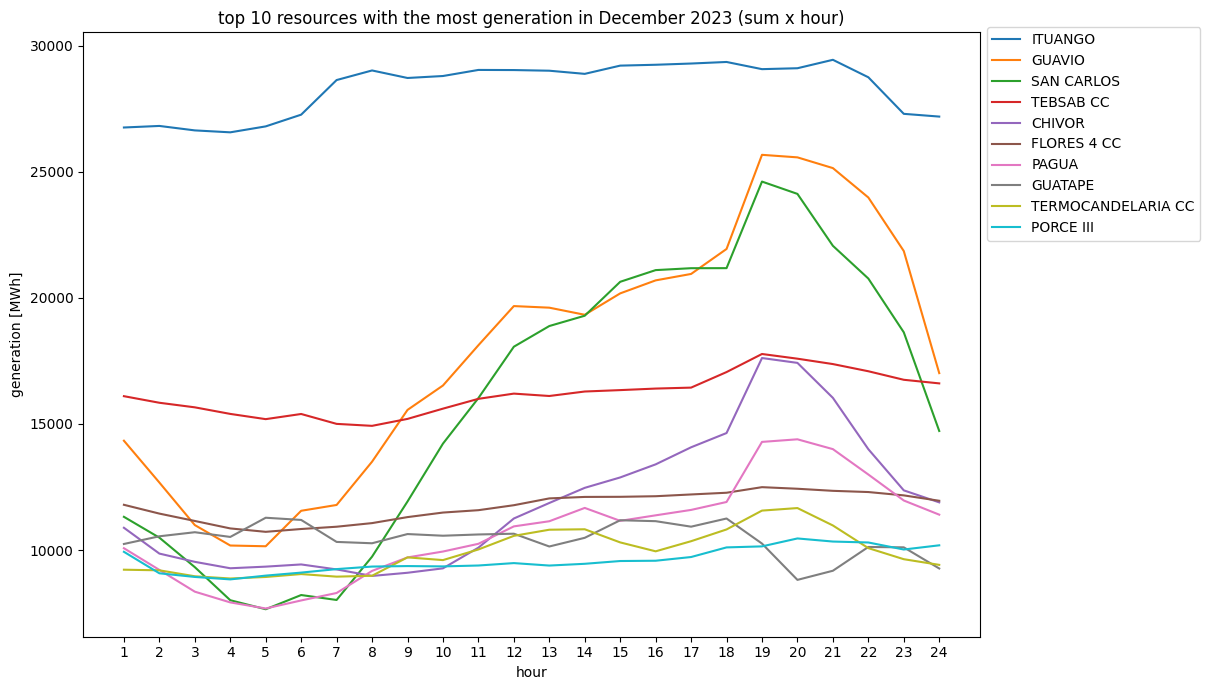

In [122]:
fig, ax = plt.subplots(figsize=(10, 7))

for i, row in df_sort.head(10).iterrows():
    ax.plot(range(1,25), row[1:-1], label=f"{row['Nombre recurso']}")

ax.set_xticks(range(1,25))
ax.set_xlabel('hour')
ax.set_ylabel('generation [MWh]')
ax.set_title('top 10 resources with the most generation in December 2023 (sum x hour)')

fig.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), ncol=1)
plt.xticks(rotation = 0)
plt.show()

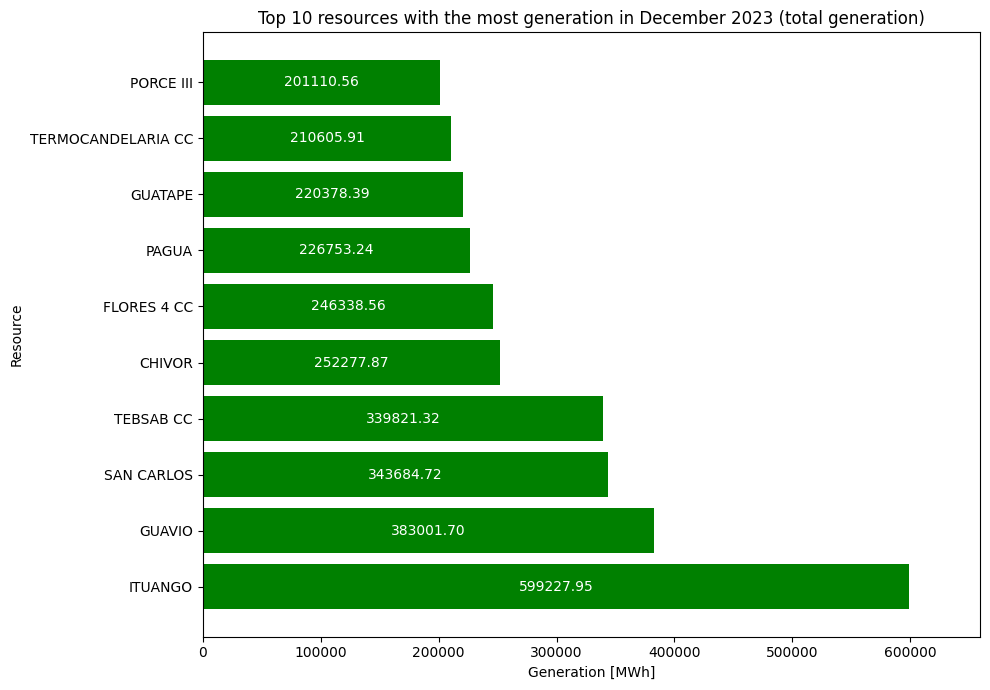

In [105]:
fig, ax = plt.subplots(figsize=(10, 7))

bars = ax.barh(df_sort.head(10)['Nombre recurso'], df_sort.head(10)['total'], color = 'green')

for bar in bars:
    width = bar.get_width()
    ax.text(width / 2, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', 
            va='center', ha='center', color='white')

ax.set_xlabel('Generation [MWh]')
ax.set_ylabel('Resource')
ax.set_title('Top 10 resources with the most generation in December 2023 (total generation)')
ax.set_xlim(right=df_total['total'].max() * 1.1)

fig.tight_layout()
plt.xticks(rotation = 0)
plt.show()

In [171]:
### stock price [COP/kWh]
december = objectAPI.request_data(
    "PrecBolsNaci",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "PrecBolsNaci",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

stockprice = pd.concat([december, thirtyone], ignore_index=True)
stockprice.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,589.05132,559.05132,559.05132,559.05132,559.05132,559.05132,656.05132,656.05132,727.28532,749.05132,755.05132,755.05132,755.05132,755.05132,763.05132,763.05132,763.05132,763.05132,763.05132,763.05132,763.05132,763.05132,755.05132,749.05132,2023-12-01
1,Sistema,Sistema,742.51116,728.55416,728.55416,728.55416,728.55416,728.55416,728.55416,728.55416,728.55416,742.51116,763.55416,763.55416,763.55416,763.55416,763.55416,763.55416,763.55416,788.05416,788.05416,788.05416,788.05416,763.55416,763.55416,742.51116,2023-12-02
2,Sistema,Sistema,745.45159,745.45159,745.45159,745.45159,745.45159,745.45159,715.45159,620.45159,640.00459,745.45159,745.45159,745.45159,745.45159,745.45159,752.95159,752.95159,752.95159,752.95159,760.45159,760.45159,760.45159,760.45159,752.95159,752.95159,2023-12-03
3,Sistema,Sistema,639.01058,619.45758,724.89258,619.45758,724.89258,724.89258,694.45758,729.45758,769.45758,769.45758,769.45758,769.45758,799.45758,769.45758,769.45758,804.95758,804.95758,804.95758,814.45758,814.45758,814.45758,799.45758,799.45758,804.95758,2023-12-04
4,Sistema,Sistema,754.46729,753.46729,753.46729,753.46729,753.46729,753.46729,753.46729,753.46729,753.46729,754.46729,817.46729,822.46729,822.46729,822.46729,852.46729,852.46729,852.46729,852.46729,852.46729,852.46729,822.46729,817.46729,852.46729,822.46729,2023-12-05


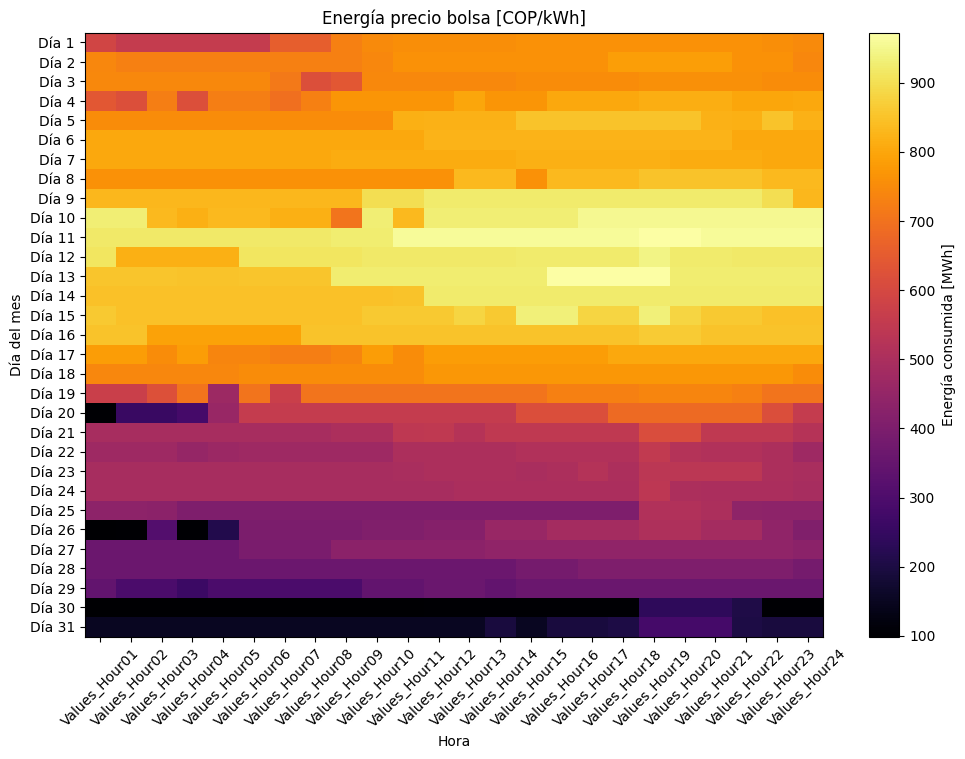

In [30]:
title = 'Energía precio bolsa [COP/kWh]'
plotdemand(stockprice, title)

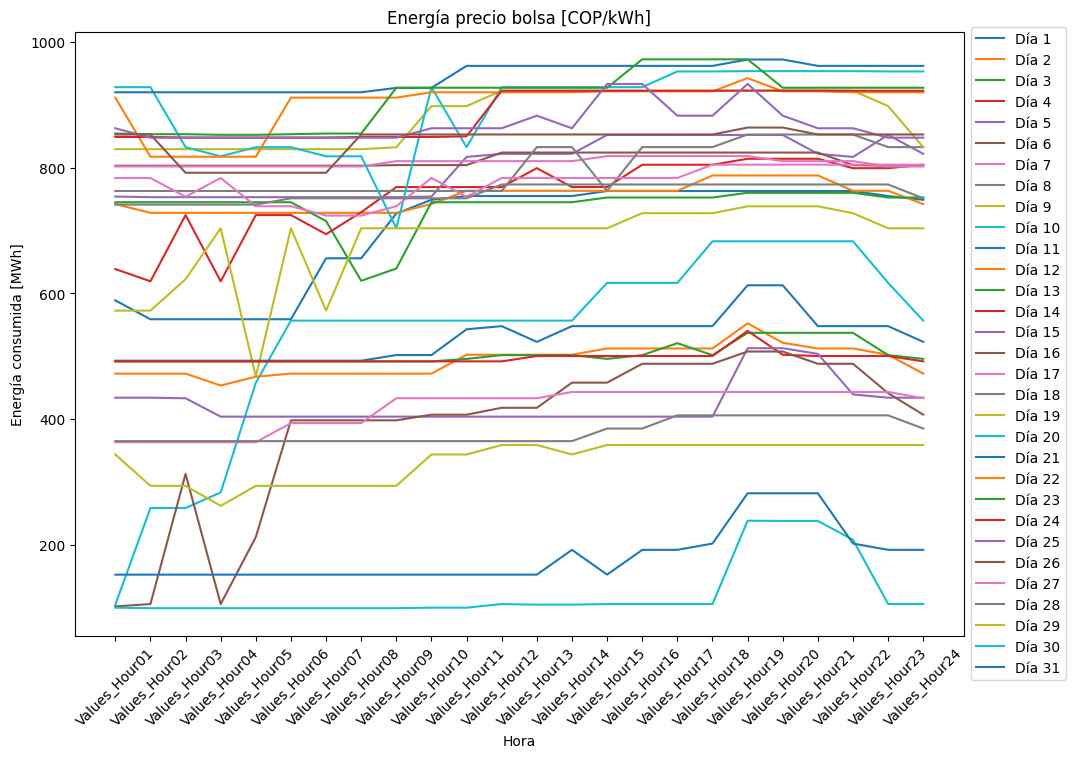

In [31]:
title = 'Energía precio bolsa [COP/kWh]'
plotdaysdemand(stockprice, title)

In [170]:
### scarcity price [COP/kWh]
## Precio de Escasez de Activación calculado de acuerdo con la Resolución CREG 140 del 2017
objectAPI.get_collections('DemaCome')
scarcity_activation = objectAPI.request_data(
    "PrecEscaAct",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 1)
)

print(scarcity_activation, '\n')
objectAPI.get_collections('PrecEscaAct')

        Id       Value       Date
0  Sistema  1144.04344 2023-12-01 



,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
120,PrecEscaAct,Precio Escasez Activación por Sistema,Sistema,31,DailyEntities,http://servapibi.xm.com.co/daily,No aplica,COP/kWh,Precio de Escasez de Activación calculado de acuerdo con la Resolución CREG 140 del 2017


In [169]:
## Establecido por la CREG- y actualizado mensualmente con base en la variación de un índice de precios de combustibles
scarcity_december = objectAPI.request_data(
    "PrecEsca",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 1)
)

print(scarcity_december, '\n')
objectAPI.get_collections('PrecEsca')

        Id      Value       Date
0  Sistema  778.99511 2023-12-01 



,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
121,PrecEsca,Precio Escasez por Sistema,Sistema,31,DailyEntities,http://servapibi.xm.com.co/daily,No aplica,COP/kWh,"Establecido por la CREG- y actualizado mensualmente con base en la variación de un índice de precios de combustibles, tiene una doble función. Por una parte indica a partir de qué momento las Obligaci"


In [181]:
### Energía Comprada y vendida [kWh] en Bolsa para atender la demanda
december = objectAPI.request_data(
    "CompBolsNaciEner",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "CompBolsNaciEner",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

purchased_energy = pd.concat([december, thirtyone], ignore_index=True)
purchased_energy.head()

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,3317497.11,3333980.56,3173237.59,3192304.86,3202469.44,3135885.53,3210743.81,3360676.35,3595569.22,3595298.58,3603736.81,3712228.90,3786793.62,3898924.55,3773242.39,3668251.52,3637981.01,3621899.32,3480231.10,3473644.36,3587617.42,3716496.84,3631897.08,3562548.98,2023-12-01
1,Sistema,Sistema,3272852.27,3109305.88,3026174.68,3045223.35,3136459.16,3184806.54,3254687.21,3329399.83,3204756.63,3358874.32,3550298.93,3607828.72,3718881.90,3572988.93,3591647.32,3610461.82,3758888.29,3787018.79,3627279.19,3809621.57,3940671.21,3962629.94,3660969.68,3413609.14,2023-12-02
2,Sistema,Sistema,3354933.47,3263352.44,3215784.88,3165324.97,3110397.37,3051515.77,3146109.04,3295454.23,3420539.65,3490044.24,3456478.83,3336004.80,3292764.10,3378172.17,3359075.84,3334152.52,3223976.45,2854211.63,2757356.34,2728315.89,2694857.51,2696905.37,2691600.59,2688921.95,2023-12-03
3,Sistema,Sistema,3251156.61,2997994.00,2802153.30,2736030.54,2795317.98,2972537.25,3141678.77,3491406.02,3492043.60,3368077.77,3287391.85,3167198.45,3101406.38,3204658.51,3331495.75,3238824.58,3299137.91,3294692.82,3556658.29,3384858.89,3450885.67,3335723.53,3134778.53,2950542.34,2023-12-04
4,Sistema,Sistema,2870624.81,2982701.33,2960420.40,3163089.27,3247023.40,3267895.45,3342972.61,3481004.67,3397840.94,3408170.56,3468609.74,3572659.56,3591029.12,3490507.80,3369014.90,3272836.04,3147181.07,3167665.55,3536695.17,3446103.35,3444951.97,3770347.26,3465105.76,3481938.55,2023-12-05


In [182]:
### XM examples
objectAPI.get_collections('DemaCome') # Revisar los cruces disponibles para demanda comercial

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.
11,DemaCome,Demanda Comercial por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.
83,DemaCome,Demanda Comercial por MercadoComercializacion,MercadoComercializacion,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comercializador mas la paticipacion en la perdidas del STN y los consumos propios de los generadores.


In [260]:
# demanda regulada y no regulada por region
df_demanda = objectAPI.request_data('DemaCome', 'MercadoComercializacion', dt.date(2023, 12, 1), dt.date(2023, 12, 30))
df_demanda = df_demanda.drop('Date', axis=1)
df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True)
df_demanda.iloc[:, 3:] /= 1000
df_demanda.head()

,Id,Values_code,Values_MarketType,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,demanda_diaria
0,MercadoComercializacion,ANTIOQUIA,NO REGULADO,369.78196,369.28674,368.78528,366.80969,366.91287,377.93724,370.73588,403.46651,410.70632,409.35793,412.73012,414.29744,418.31000,414.43198,405.10504,414.77550,414.17826,401.79446,422.06650,416.35719,410.13101,392.53577,372.92950,369.81154,9493.23473
1,MercadoComercializacion,ANTIOQUIA,REGULADO,710.83566,664.63020,632.92686,625.07772,661.63862,726.50656,821.63781,905.37532,981.89704,1033.42879,1090.76048,1146.03889,1167.82323,1150.60711,1153.33031,1141.95442,1110.34825,1079.76361,1125.07710,1102.86581,1054.64008,975.13930,876.63570,785.40118,22724.34005
2,MercadoComercializacion,ARAUCA,NO REGULADO,91.95234,92.44813,92.61538,92.70190,91.66601,91.56811,91.05831,91.42551,91.06250,90.87384,91.31282,91.58978,91.75208,92.67051,92.93620,92.79740,91.97200,91.36038,91.81189,91.35446,91.32325,91.27857,91.70026,91.40043,2202.63206
3,MercadoComercializacion,ARAUCA,REGULADO,33.58967,33.93536,32.53373,31.60992,31.19030,30.87295,30.69730,32.96318,34.54786,35.60115,37.87579,42.83049,35.86592,40.25801,42.43333,41.83524,40.46016,41.32380,43.21784,43.67331,42.78555,39.02120,39.12016,37.56621,895.80843
4,MercadoComercializacion,BAJO PUTUMAYO,NO REGULADO,0.14226,0.13348,0.13123,0.12334,0.12164,0.13091,0.14448,0.17172,0.19593,0.23007,0.23274,0.27194,0.26247,0.26639,0.27006,0.26599,0.27563,0.25721,0.22690,0.21099,0.19620,0.18217,0.17286,0.16053,4.77714


In [261]:
# % de demanda por region
df_demanda = df_demanda.groupby(by=['Values_code'])['demanda_diaria'].sum()
df_demanda_porcenaje = (df_demanda*100/df_demanda.sum()).round(2).sort_values(ascending=True)

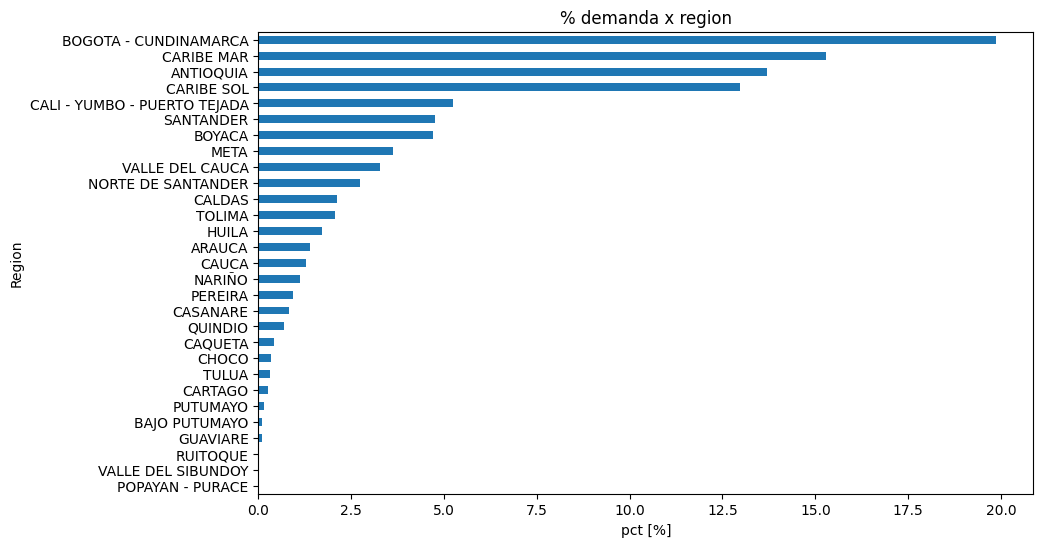

In [262]:
df_demanda_porcenaje.plot(kind = 'barh', figsize = (10, 6))
plt.xlabel('pct [%]')
plt.ylabel('Region')
plt.title(r'% demanda x region')
plt.show()

In [34]:
objectAPI.get_collections('PrecBolsNaci')

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
6,PrecBolsNaci,Precio Bolsa Nacional por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP/kWh,Precio de oferta de la última planta flexible ...


In [35]:
df_precio_bolsa = objectAPI.request_data("PrecBolsNaci", "Sistema", dt.date(2023, 1, 1), dt.date(2023, 1, 30)) #consulta de la variable precio de bolsa nacional por sistema  
df_precio_bolsa.drop(columns=['Id', 'Values_code'], inplace=True)             #Eliminación de columnas innecesarias para los cálculos requeridos
df_precio_bolsa.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
df_resumen_anual = df_precio_bolsa.aggregate(['mean', 'max', 'min'], axis=1)  #Cálculo del promedio, máximo y mínimo del precio de bolsa nacional

c:\Users\jebernate\Documents\energy_market\env\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jebernate\Documents\energy_market\env\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')


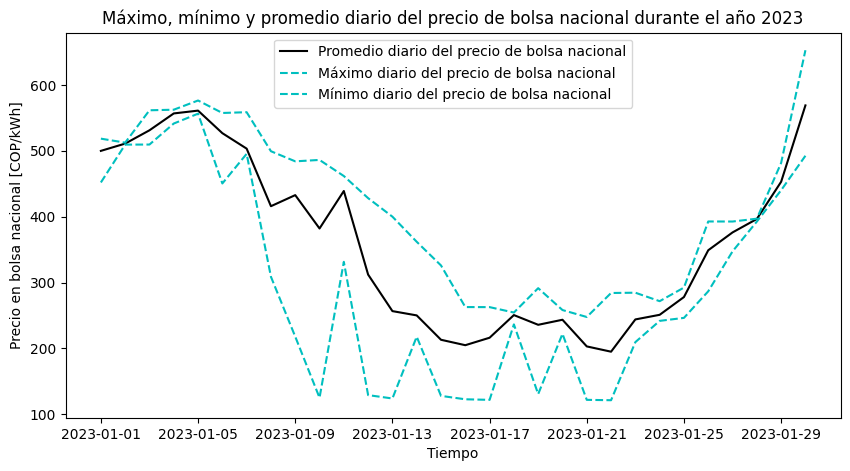

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['max'], "c--", label='Máximo diario del precio de bolsa nacional')
ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
ax.set_ylabel('Precio en bolsa nacional [COP/kWh]')
ax.set_xlabel('Tiempo')
plt.title('Máximo, mínimo y promedio diario del precio de bolsa nacional durante el año 2023')
ax.legend()
plt.show()